In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
import geopy
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df= pd.read_csv("advertising.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.rename({'Male': 'Sex'}, axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Sex                       1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
def mudar(coluna):
    if coluna==0:
        return 'Homem'
    else:
        return 'Mulher'
def Ad(coluna):
    if coluna==0:
        return 'Não clicou'
    else:
        return 'Clicou'
    
df['Sexo'] = df['Sex'].map(mudar)
df['Click'] = df['Clicked on Ad'].map(Ad)

<Figure size 1080x432 with 0 Axes>

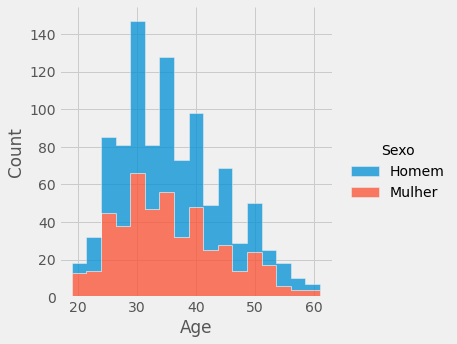

In [7]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')
sns.displot(x='Age',hue='Sexo',data=df,element="step",multiple="stack")

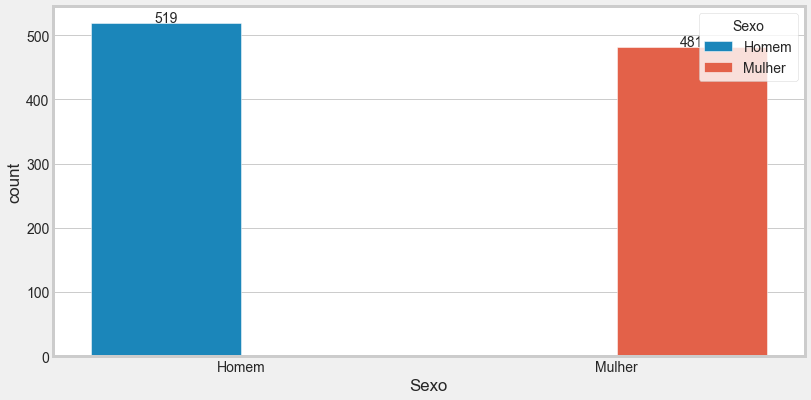

In [10]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax=sns.countplot(x='Sexo',data=df,hue='Sexo')
for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+2),ha='center')

<AxesSubplot:xlabel='Sexo', ylabel='Age'>

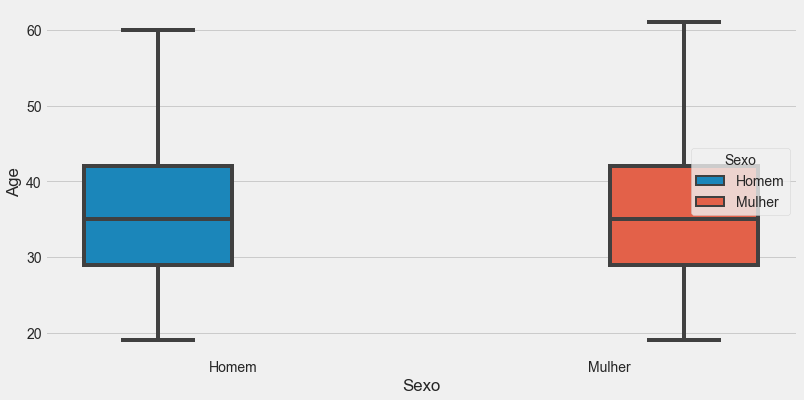

In [59]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.boxplot(x='Sexo',y='Age',hue='Sexo',data=df)

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Sex                       1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Sexo                      1000 non-null   object 
 11  Click                     1000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


<Figure size 864x648 with 0 Axes>

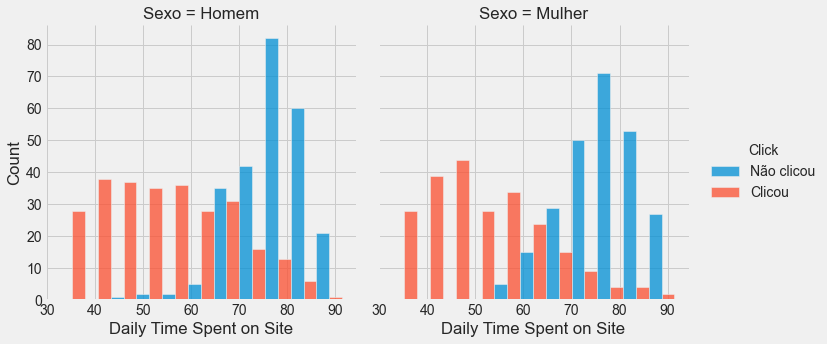

In [75]:
plt.figure(figsize=(12,9))
g=sns.displot(data=df, x="Daily Time Spent on Site", col='Sexo',hue='Click', multiple="dodge")
plt.style.use('fivethirtyeight')

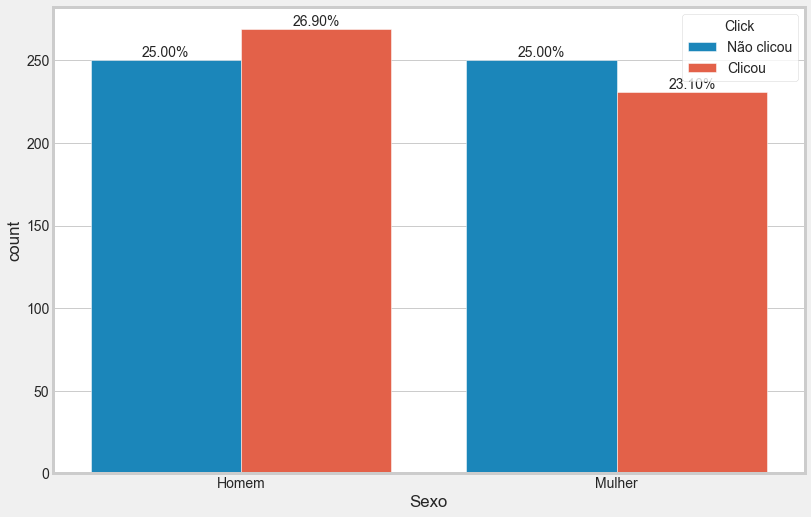

In [73]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
ax=sns.countplot(x='Sexo',data=df,hue='Click')
for p in ax.patches:
    ax.annotate('{:0.2f}%'.format(p.get_height()/len(df)*100), (p.get_x()+0.2, p.get_height()+2),ha='center')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Click'>

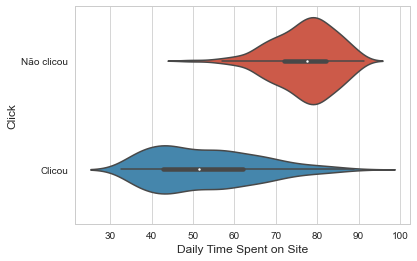

In [12]:
sns.violinplot(x='Daily Time Spent on Site', y='Click', data=df)

In [13]:
del df['Click']
del df['Sexo']

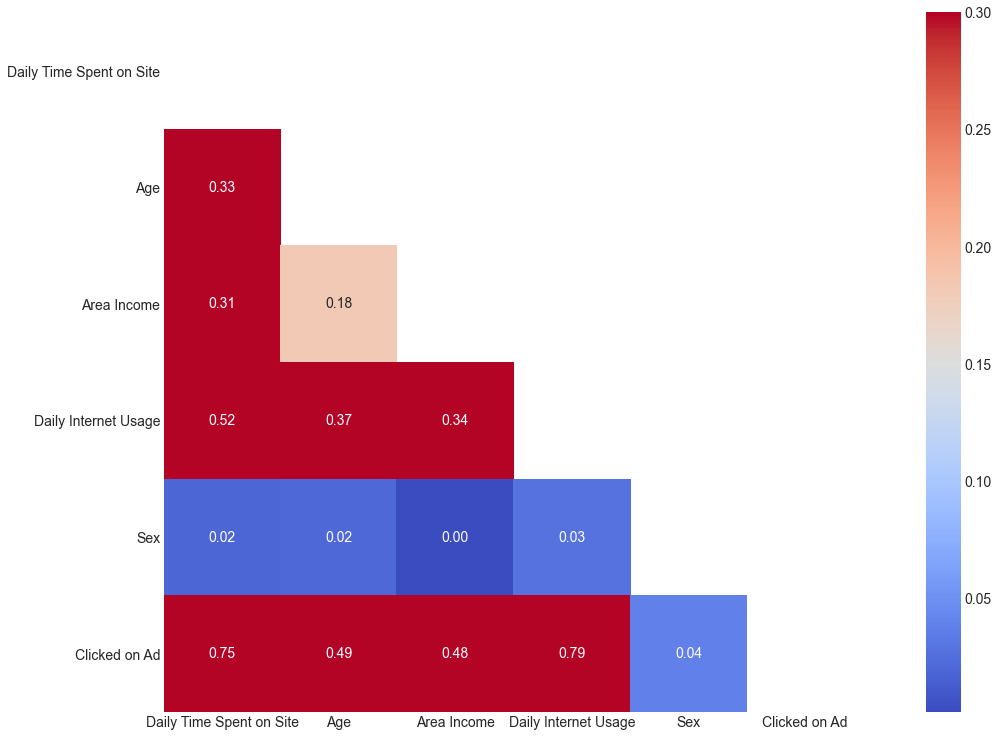

In [14]:
corr_data = df.corr()

mask = np.zeros_like(corr_data)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,12))

sns.heatmap(corr_data.abs(),cmap='coolwarm', annot=True, fmt='.2f',square=True,mask=mask, vmax=.3)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
cat_data = df.select_dtypes(include = 'object')
num_data = df.select_dtypes(exclude = 'object')
#Fazer a troca de palavras pro números para que as analises possam ser feitas.
for i in cat_data.columns:
    cat_data[i] = LabelEncoder().fit_transform(cat_data[i])

In [16]:
df = pd.concat([cat_data, num_data], axis = 1)
df.head()

,Ad Topic Line,City,Country,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Sex,Clicked on Ad
0,91,961,215,439,68.95,35,61833.90,256.09,0,0
1,464,903,147,474,80.23,31,68441.85,193.77,1,0
2,566,111,184,367,69.47,26,59785.94,236.50,0,0
3,903,939,103,56,74.15,29,54806.18,245.89,1,0
4,766,805,96,767,68.37,35,73889.99,225.58,0,0
